In [ ]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=411a31bab461dcbbdb6e497956c6ab218e8d646122d878adf75e4d06c0157c1d
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
import numpy
from keras.utils import to_categorical
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
from PIL import Image
from keras.datasets import cifar10
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Задание 1

Были загружены данные из набора MNIST

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # загрузка данных

11490434/11490434 [==============================] - 0s 0us/step


# Задание 2

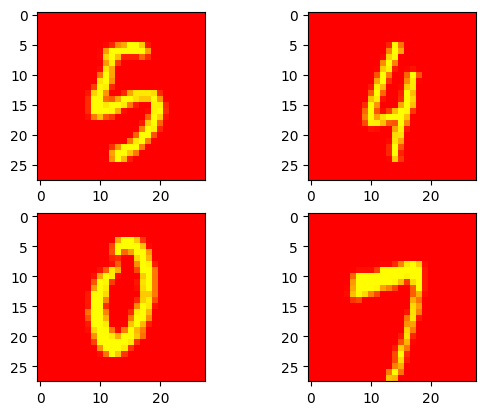

In [ ]:
for i in range(1, 5):
  plt.subplot(2, 2, i)
  plt.imshow(random.choice(X_train), cmap=plt.get_cmap('autumn'))
plt.show()

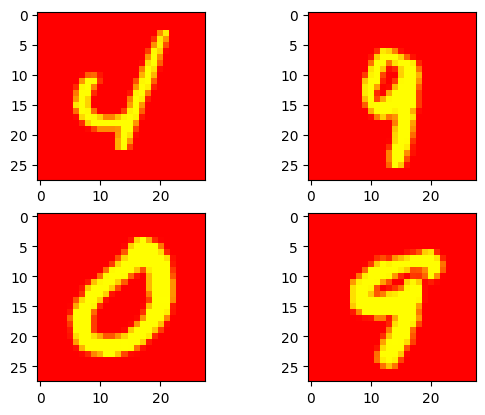

In [ ]:
for i in range(1, 5):
  plt.subplot(2, 2, i)
  plt.imshow(random.choice(X_test), cmap=plt.get_cmap('autumn'))
plt.show()

Данный набор данных содержит в себе изображения цифр и массив с цифрами как целевой признак. Учебный набор данных представлен в виде трехмерных массивов.

# Задание 3

Чтобы провести предобработку данных необходимо представить этот массив в виде одномерного, т.к. каждый пиксель - отдельный входной признак.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.shape[2]

28

In [ ]:
X_train.shape[1]

28

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2] # Количество пикселей
X_train = X_train.reshape(X_train.shape[0], num_pixels) # shape 0 для того чтобы получился массив размером (длина X_train, кол-во пикселей)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

In [ ]:
X_train.shape

(60000, 784)

Значения пикселей заданы в диапазоне от 0 до 255. Для эффективного обучения нейронной сети необходимо масштабировать входные значения. Для этого нормализуем значения пикселей в диапозон от 0 до 1, разделив каждое значение на 255.


In [ ]:
X_train = X_train/255
X_test = X_test/255

Выходное значение - целое число от 0 до 9. Это задача классификации с несколькими классами. Необходимо преобразовать метки классов в формат, который нейронная сеть сможет "понять", с помощью np_utils.to_categorical() можно создать двоичные матрицы.

In [ ]:
y_train = to_categorical(y_train) # подготовка к квалицифкации - вектор, в котором на месте определенного класа единица
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)
print(y_test.shape)
print(y_train.shape)

10
(10000, 10)
(60000, 10)


# Задание 4

Необходимо создать полносвязную модель с двумя слоями. На входном слое будет использоваться линейная функция активации, на выходном - softmax. Функция потерь - categorical_crossentropy - функция потерь для многоклассовой классификации.

In [ ]:
model = Sequential()
model.add(Dense(64,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 20, batch_size = 200, verbose = 2)
scores = model.evaluate(X_test, y_test, verbose=0)
history_df = pd.DataFrame(history.history)

Epoch 1/20
300/300 - 2s - loss: 0.4731 - accuracy: 0.8683 - val_loss: 0.2981 - val_accuracy: 0.9170 - 2s/epoch - 7ms/step
Epoch 2/20
300/300 - 1s - loss: 0.2966 - accuracy: 0.9165 - val_loss: 0.2834 - val_accuracy: 0.9183 - 1s/epoch - 3ms/step
Epoch 3/20
300/300 - 1s - loss: 0.2788 - accuracy: 0.9225 - val_loss: 0.2730 - val_accuracy: 0.9232 - 999ms/epoch - 3ms/step
Epoch 4/20
300/300 - 1s - loss: 0.2708 - accuracy: 0.9241 - val_loss: 0.2676 - val_accuracy: 0.9268 - 1s/epoch - 3ms/step
Epoch 5/20
300/300 - 1s - loss: 0.2657 - accuracy: 0.9253 - val_loss: 0.2657 - val_accuracy: 0.9254 - 1s/epoch - 4ms/step
Epoch 6/20
300/300 - 2s - loss: 0.2609 - accuracy: 0.9269 - val_loss: 0.2652 - val_accuracy: 0.9272 - 2s/epoch - 7ms/step
Epoch 7/20
300/300 - 3s - loss: 0.2586 - accuracy: 0.9285 - val_loss: 0.2715 - val_accuracy: 0.9240 - 3s/epoch - 9ms/step
Epoch 8/20
300/300 - 2s - loss: 0.2559 - accuracy: 0.9287 - val_loss: 0.2710 - val_accuracy: 0.9263 - 2s/epoch - 6ms/step
Epoch 9/20
300/300 - 

In [ ]:
df = pd.DataFrame({"Модель": [],"Архитектура": [], "Кол-во слоёв": [], "Функция активации": [], "Кол-во эпох": [], "Точность": [], "Потери": []}, index=[])

In [ ]:
df.loc[1] = ['DNN', 'D-64', 2, 'Линейная', 20, scores[1], scores[0]]

In [ ]:
df

,Модель,Архитектура,Кол-во слоёв,Функция активации,Кол-во эпох,Точность,Потери
1,DNN,D-64,2,Линейная,20,0.9266,0.275218


# Задание 5

Далее необходимо вывести classification_report И confusion_matrix

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)
y_test_argmax = np.argmax(y_test,axis = 1)
print("Classification Report: ")
print(classification_report(y_test_argmax,predictions))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.92      0.85      0.88       892
           6       0.95      0.95      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



*   support - количество примеров каждого класса в наборе данных
*   F1 score - гармоническое среднее точности и плотности
*   recall -  полнота - отношение правильно классифицированных положительных примеров к общему количеству фактических положительных примеров
*   precision - отношение правильно классифицированных положительных примеров к общему количеству классифицированных как положительные

Confusion_matrix (Матрица несоответствий)


<Axes: >

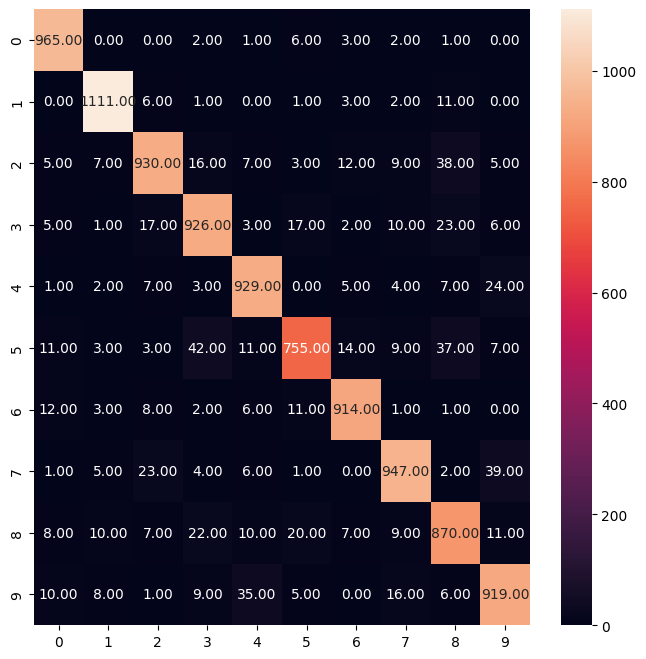

In [ ]:
print("Confusion_matrix (Матрица несоответствий)")
cm = confusion_matrix(y_test_argmax, predictions)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='.2f')

По classification_report и confussion matrix можно сделать выводы о том, что:


*   Высокие значения precision говорят о том, что количество правильно классифицированных положительных примеров крайне высоко
*   Высокие значения recall говорят о том, что модель классифицирует большую часть положительных наблюдей верно, т.е. модель успешно классифицирует большинство наблюдений для каждого класса


*   Высокие значения F1-Score говорит о маленькой разницей между precission и recall
*   Т.к. на главной диагонали confussion matrix распологаются высокие значения, можно сделать вывод о том, что модель верно классифицирует большинство значений





Необходимо построить график потерь и точности обучения по эпохам для данной модели. Для данной цели была создана функция ploting, которая выводит график зависимости потерь от эпохи и график зависимости точности от эпохи

In [ ]:
def ploting(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.title("График потерь")
  plt.plot(train_loss,label = 'train_loss')
  plt.plot(val_loss, label = 'val_loss', color = 'r')
  plt.xlabel("Эпоха")
  plt.ylabel("Значение")
  plt.grid()
  plt.legend()
  plt.show()

  plt.title("График точности")
  plt.plot(train_accuracy,label = 'train_accuracy')
  plt.plot(val_accuracy, label = 'val_accuracy', color = 'r')
  plt.xlabel("Эпоха")
  plt.ylabel("Значение")
  plt.grid()
  plt.legend()
  plt.show()

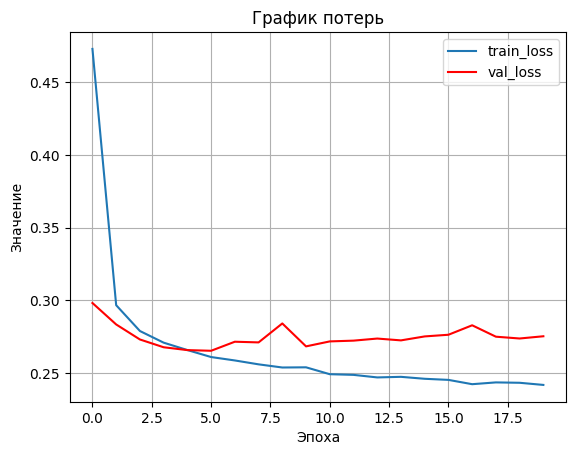

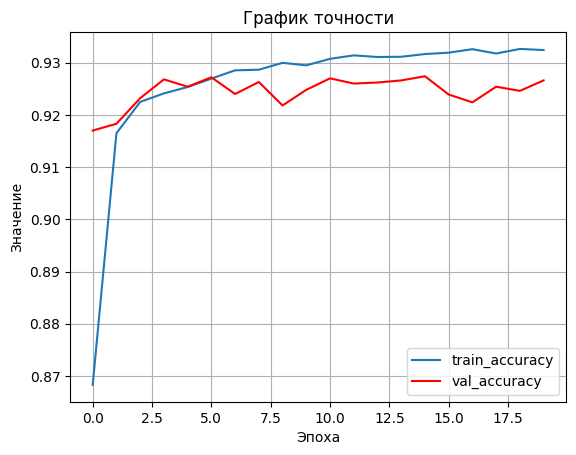

In [ ]:
ploting(history)

По данным графикам можно сделать вывод о том, что значение потерь резко уменьшается с 1 по 3 эпохи, что говорит о том, что в этот момент модель обучается, затем график сглаживается. Значение точности же резко возрастает с 1 по 3 эпохи, что также говорит о том, что в этот период модель обучается.

# Задание 6

Необходимо повторить данный эксперимент с другой архитектурой НС, а именно - изменить функцию активации на нелинейную. Отличие linear от sigmoid в том, что при использовании sigmoid значения получаются от 0 до 1, в случае с Linear от 0 до бесконечности.

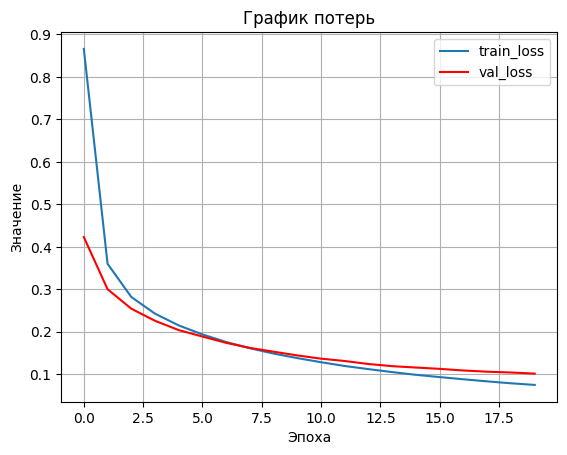

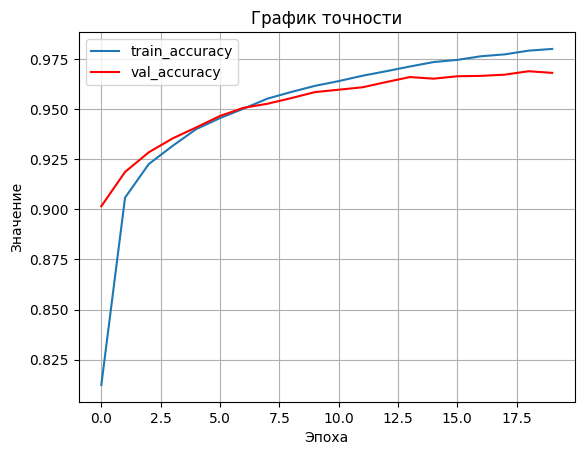

In [ ]:
model = Sequential()
model.add(Dense(64,input_dim = num_pixels,activation = 'sigmoid'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 20, batch_size = 200, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0)
history_df = pd.DataFrame(history.history)
history_df
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.866003,0.812417,0.422883,0.9015
1,0.360048,0.905783,0.300125,0.9186
2,0.281837,0.922533,0.254285,0.9284
3,0.242519,0.931567,0.225747,0.9353
4,0.214858,0.939967,0.203843,0.9408
5,0.193621,0.945450,0.188658,0.9465
6,0.175732,0.950183,0.173831,0.9506
7,0.161154,0.955150,0.161879,0.9526
8,0.148514,0.958450,0.152990,0.9554
9,0.137843,0.961517,0.144194,0.9584


По данному графику и истории видно, что данная модель более точно предсказывает значения, на что указывает значения val_loss и val_accuracy и положения графика

In [ ]:
df.loc[2] = ['DNN', 'D-64', 2, 'sigmoid', 20, scores[1], scores[0]]

In [ ]:
df

,Модель,Архитектура,Кол-во слоёв,Функция активации,Кол-во эпох,Точность,Потери
1,DNN,D-64,2,Линейная,20,0.9266,0.275218
2,DNN,D-64,2,sigmoid,20,0.9680,0.101423


# Задание 7

## **Модель №1**

Количество слоёв было увеличено на 1, количество нейронов было уменьшено. Количество эпох - 40

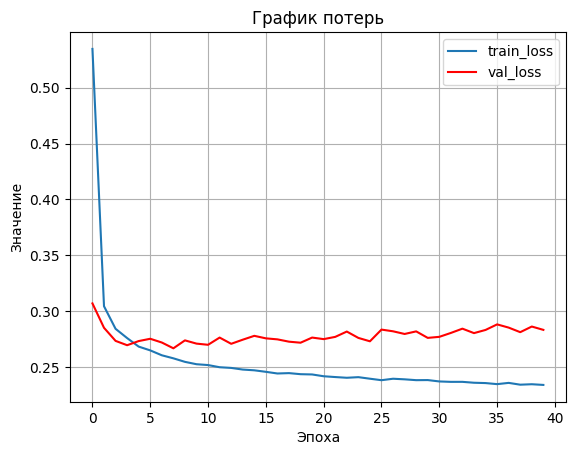

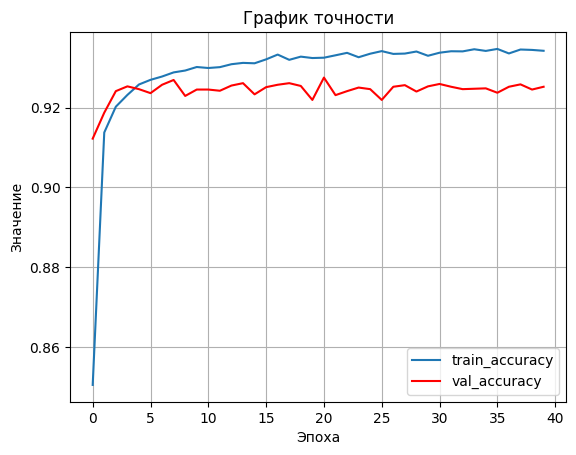

In [ ]:
model = Sequential()
model.add(Dense(32,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0)
history_df = pd.DataFrame(history.history)
history_df
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.534684,0.850467,0.306909,0.9122
1,0.304386,0.913733,0.285076,0.9187
2,0.284167,0.920200,0.273374,0.9241
3,0.275881,0.923150,0.269495,0.9253
4,0.268247,0.925767,0.273203,0.9246
5,0.264859,0.926933,0.275268,0.9236
6,0.260482,0.927767,0.271915,0.9257
7,0.257761,0.928800,0.266736,0.9269
8,0.254605,0.929267,0.273830,0.9229
9,0.252483,0.930150,0.270929,0.9245


В сравнении с моделью с функцией активации linear и с двумя слоями, данная модель обладает чуть более лучшими значениями потерь и точности (отличие в сотых долях)

In [ ]:
df.loc[3] = ['DNN', 'D-32, D-16', 3, 'Линейная', 40, scores[1], scores[0]]

In [ ]:
df

,Модель,Архитектура,Кол-во слоёв,Функция активации,Кол-во эпох,Точность,Потери
1,DNN,D-64,2,Линейная,20,0.9266,0.275218
2,DNN,D-64,2,sigmoid,20,0.9680,0.101423
3,DNN,"D-32, D-16",3,Линейная,40,0.9252,0.283234


## **Модель №2**

В данной модели было увеличено количество слоёв на 1, количество также было увеличено.

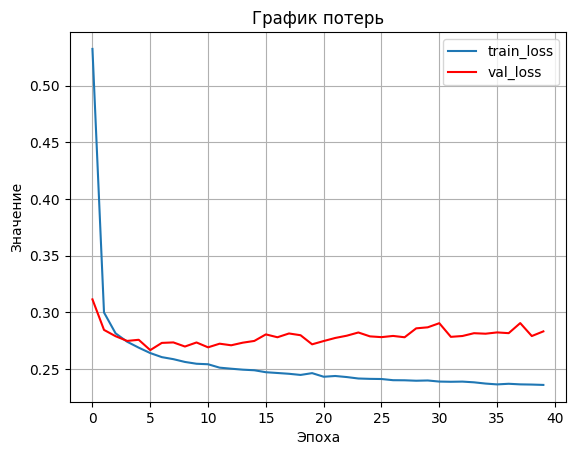

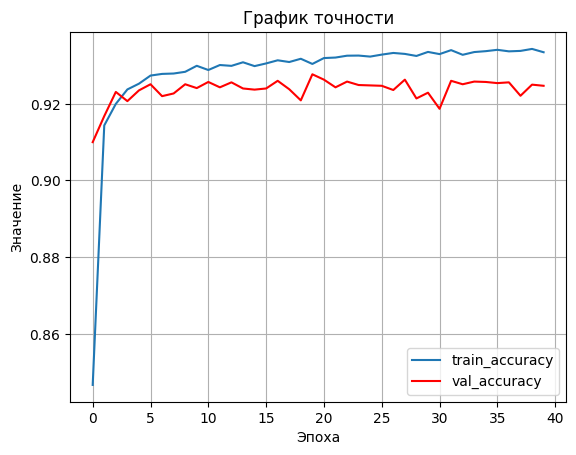

In [ ]:
model = Sequential()
model.add(Dense(30,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(20,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0)
history_df = pd.DataFrame(history.history)
history_df
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.532474,0.846683,0.311504,0.9100
1,0.299934,0.914367,0.284564,0.9168
2,0.281539,0.919983,0.278996,0.9231
3,0.274130,0.923750,0.274844,0.9207
4,0.268906,0.925250,0.275839,0.9235
5,0.264127,0.927367,0.266731,0.9251
6,0.260540,0.927800,0.273095,0.9220
7,0.258745,0.927900,0.273520,0.9227
8,0.256294,0.928350,0.269901,0.9251
9,0.254702,0.929917,0.273476,0.9241


Значения потерь и точности данной модели примерно такие же как и у предыдущей

In [ ]:
df.loc[4] = ['DNN', 'D-40, D-30, D-20, D-16', 4, 'Линейная', 40, scores[1], scores[0]]

In [ ]:
df

,Модель,Архитектура,Кол-во слоёв,Функция активации,Кол-во эпох,Точность,Потери
1,DNN,D-64,2,Линейная,20,0.9266,0.275218
2,DNN,D-64,2,sigmoid,20,0.9680,0.101423
3,DNN,"D-32, D-16",3,Линейная,40,0.9252,0.283234
4,DNN,"D-40, D-30, D-20, D-16",4,Линейная,40,0.9247,0.283263


## **Модель №3**

Был добавлен 1 слой и были добавлены нейроны.

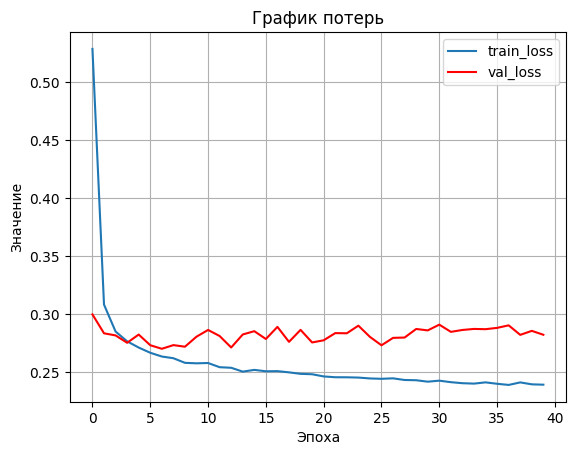

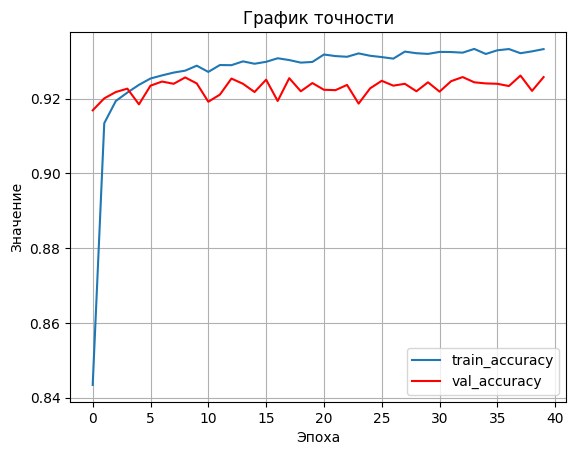

In [ ]:
model = Sequential()
model.add(Dense(40,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(30,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(20,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0)
history_df = pd.DataFrame(history.history)
history_df
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.528585,0.843400,0.299930,0.9169
1,0.308383,0.913450,0.283651,0.9201
2,0.285192,0.919400,0.281837,0.9218
3,0.276740,0.921650,0.275495,0.9227
4,0.271384,0.923717,0.282582,0.9185
5,0.266895,0.925417,0.273392,0.9235
6,0.263662,0.926250,0.270321,0.9246
7,0.262191,0.927000,0.273483,0.9240
8,0.258233,0.927517,0.272117,0.9257
9,0.257805,0.928850,0.280745,0.9241


In [ ]:
df.loc[5] = ['DNN', 'D-40, D-30, D-20, D-16', 5, 'relu', 40, scores[1], scores[0]]

In [ ]:
df

,Модель,Архитектура,Кол-во слоёв,Функция активации,Кол-во эпох,Точность,Потери
1,DNN,D-64,2,Линейная,20,0.9266,0.275218
2,DNN,D-64,2,sigmoid,20,0.9680,0.101423
3,DNN,"D-32, D-16",3,Линейная,40,0.9252,0.283234
4,DNN,"D-40, D-30, D-20, D-16",4,Линейная,40,0.9247,0.283263
5,DNN,"D-40, D-30, D-20, D-16",5,relu,40,0.9258,0.282400


## **Модель №4**

Был добавлен один слой и дополнительные нейроны.

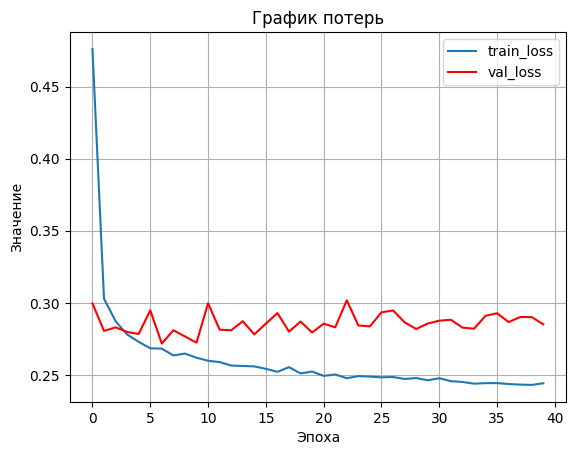

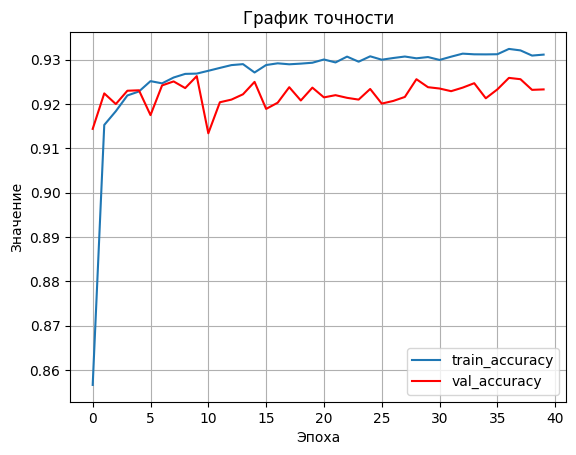

In [ ]:
model = Sequential()
model.add(Dense(50,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(40,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(30,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(20,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0)
history_df = pd.DataFrame(history.history)

ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.476190,0.856633,0.299578,0.9144
1,0.302848,0.915283,0.280476,0.9224
2,0.287256,0.918383,0.282983,0.9200
3,0.278003,0.921933,0.279765,0.9230
4,0.272902,0.922833,0.278380,0.9231
5,0.268438,0.925167,0.294762,0.9175
6,0.268184,0.924667,0.271689,0.9242
7,0.263475,0.925983,0.280950,0.9251
8,0.264766,0.926800,0.276665,0.9236
9,0.261881,0.926867,0.272317,0.9263


In [ ]:
df.loc[6] = ['DNN', 'D-50, D-40, D-30, D-20, D-16, D-10', 6, 'Линейная', 40, scores[1], scores[0]]

In [ ]:
df

,Модель,Архитектура,Кол-во слоёв,Функция активации,Кол-во эпох,Точность,Потери
1,DNN,D-64,2,Линейная,20,0.9266,0.275218
2,DNN,D-64,2,sigmoid,20,0.9680,0.101423
3,DNN,"D-32, D-16",3,Линейная,40,0.9252,0.283234
4,DNN,"D-40, D-30, D-20, D-16",4,Линейная,40,0.9247,0.283263
5,DNN,"D-40, D-30, D-20, D-16",5,relu,40,0.9258,0.282400
6,DNN,"D-50, D-40, D-30, D-20, D-16, D-10",6,Линейная,40,0.9233,0.285056


## **Модель №5**

Был добавлен один слой и дополнительные нейроны

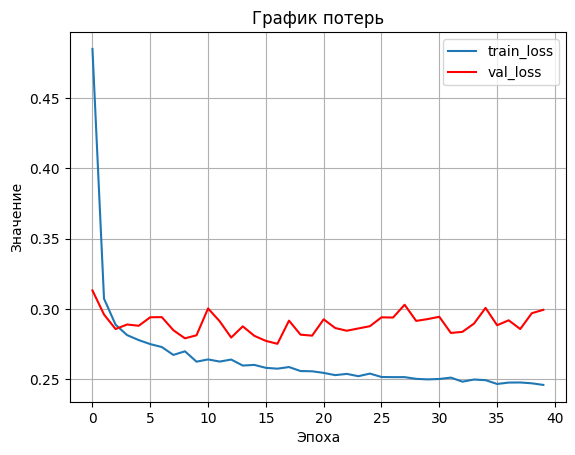

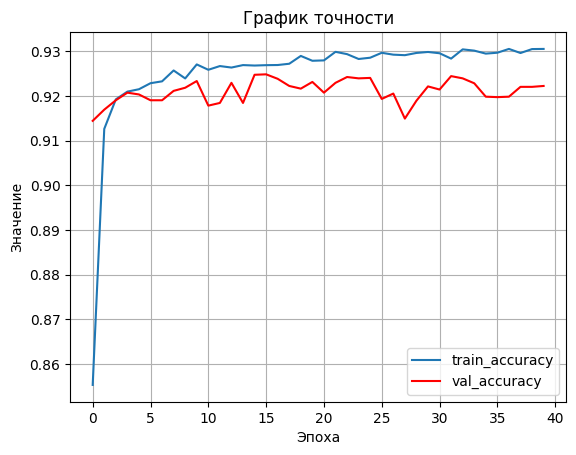

In [ ]:
model = Sequential()
model.add(Dense(60,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(50,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(40,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(30,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(20,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0)
history_df = pd.DataFrame(history.history)

ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.485011,0.855333,0.313049,0.9144
1,0.307212,0.912600,0.295927,0.9169
2,0.288681,0.919200,0.285587,0.9190
3,0.281257,0.920933,0.288826,0.9207
4,0.277725,0.921467,0.287905,0.9203
5,0.274862,0.922817,0.293963,0.9190
6,0.272763,0.923233,0.294063,0.9190
7,0.267153,0.925667,0.284745,0.9211
8,0.269732,0.923883,0.278971,0.9218
9,0.262350,0.927017,0.281149,0.9233


По данным моделям можно сделать вывод о том, что при добавлении слоёв и увеличении количества нейронов на данных входных данных сложно добиться значительных изменений в качестве предсказывания, возможно, стоит изменить другие параметры модели для достижения наилучшей производительности

In [ ]:
df.loc[7] = ['DNN', 'D-60, D-50, D-40, D-30, D-20, D-16, D-10', 7, 'Линейная', 40, scores[1], scores[0]]

# Задание 8

Была создана, скомпилированна и обучена сверточная нейронная сеть, содержащая в себе 1 сверточный слой с размером 3x3, 1 слой пулинга с размером 2x2, 1 слой дропаут с параметром 0.25, полносвязный слой с 128 нейронами и функцией активации relu, также выходной слой с функцией активации softmax

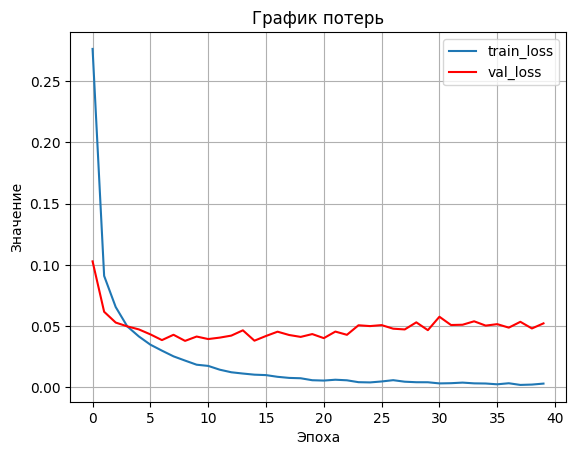

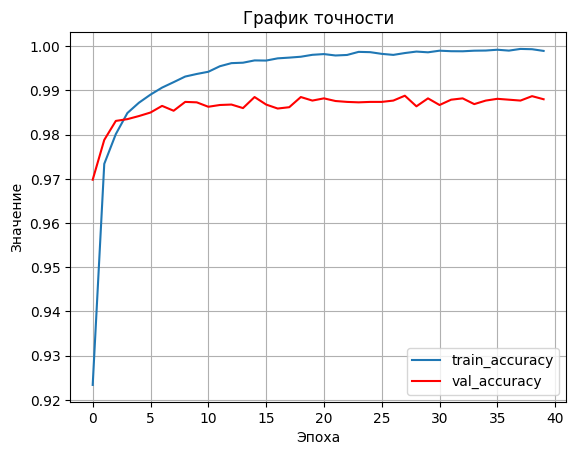

In [ ]:
# Создание сверточной нейронной сети
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Компиляция
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=200, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
history_df = pd.DataFrame(history.history)
#
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.276327,0.923383,0.102803,0.9698
1,0.090949,0.973383,0.061643,0.9788
2,0.065514,0.980117,0.052826,0.9831
3,0.049713,0.984883,0.049727,0.9835
4,0.041511,0.987217,0.047244,0.9842
5,0.034764,0.989050,0.043176,0.9850
6,0.029880,0.990633,0.038503,0.9865
7,0.025237,0.991867,0.042852,0.9854
8,0.021765,0.993133,0.037862,0.9874
9,0.018399,0.993717,0.041410,0.9873


Данная модель предсказывает значения более точно в сравнении с полносвязной моделью.

In [ ]:
df.loc[8] = ['CNN', 'Conv, Pool, Dropout, D-128, D', 6, 'relu', 40, scores[1], scores[0]]

In [ ]:
df

,Модель,Архитектура,Кол-во слоёв,Функция активации,Кол-во эпох,Точность,Потери
1,DNN,D-64,2,Линейная,20,0.9266,0.275218
2,DNN,D-64,2,sigmoid,20,0.9680,0.101423
3,DNN,"D-32, D-16",3,Линейная,40,0.9252,0.283234
4,DNN,"D-40, D-30, D-20, D-16",4,Линейная,40,0.9247,0.283263
5,DNN,"D-40, D-30, D-20, D-16",5,relu,40,0.9258,0.282400
6,DNN,"D-50, D-40, D-30, D-20, D-16, D-10",6,Линейная,40,0.9233,0.285056
7,DNN,"D-60, D-50, D-40, D-30, D-20, D-16, D-10",7,Линейная,40,0.9222,0.299269
8,CNN,"Conv, Pool, Dropout, D-128, D",6,relu,40,0.9880,0.052168


# Задание 9

Данная модель обладает 3 сверточными слоями, 2 слоями пуллинга и одним слоем дропаут. Полносвязные слои такие же, как и в предыдущей модели.

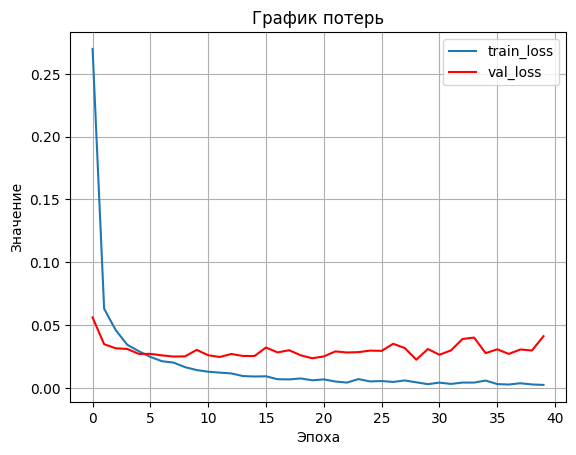

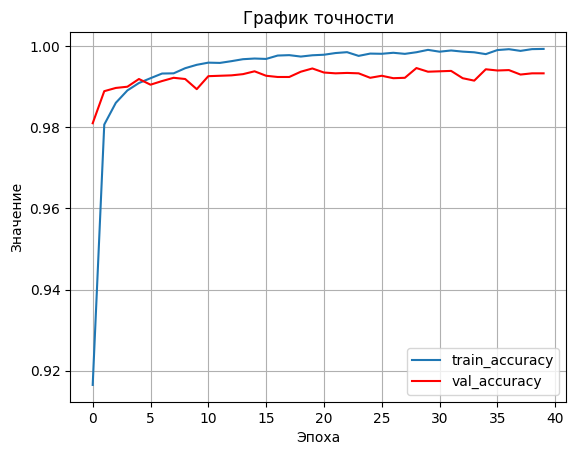

In [ ]:
# Создание сверточной нейронной сети
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1))) # слой свертки с 32 фильтрами размером 3 на 3, функция активации релу
model.add(MaxPooling2D(pool_size=(2, 2))) # слой подвыборки (уменьшает размерность карт чтобы уменьшить кол-во параметров)
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Dropout(0.25)) # выпадение 25% нейронов чтобы не было переобучения
model.add(Flatten())# выравниваение данных перед подачей на полносвязный слой потому что следующзий слой ожидает вектор
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Компиляция
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=200, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
history_df = pd.DataFrame(history.history)
#
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.269899,0.916500,0.056015,0.9810
1,0.063015,0.980667,0.034701,0.9889
2,0.045974,0.986033,0.031454,0.9897
3,0.034251,0.989083,0.030952,0.9900
4,0.029151,0.990917,0.026981,0.9919
5,0.024608,0.992100,0.027014,0.9905
6,0.021167,0.993250,0.025829,0.9914
7,0.020085,0.993300,0.024880,0.9922
8,0.016421,0.994567,0.025037,0.9919
9,0.014148,0.995400,0.030182,0.9894


Данная модель предсказывает значения точнее, чем предыдущая.

In [ ]:
df.loc[9] = ['CNN', 'Conv, Pool, Conv, Pool, Conv, Dropout, D-128, D', 9, 'relu', 40, scores[1], scores[0]]

In [ ]:
df

,Модель,Архитектура,Кол-во слоёв,Функция активации,Кол-во эпох,Точность,Потери
1,DNN,D-64,2,Линейная,20,0.9266,0.275218
2,DNN,D-64,2,sigmoid,20,0.9680,0.101423
3,DNN,"D-32, D-16",3,Линейная,40,0.9252,0.283234
4,DNN,"D-40, D-30, D-20, D-16",4,Линейная,40,0.9247,0.283263
5,DNN,"D-40, D-30, D-20, D-16",5,relu,40,0.9258,0.282400
6,DNN,"D-50, D-40, D-30, D-20, D-16, D-10",6,Линейная,40,0.9233,0.285056
7,DNN,"D-60, D-50, D-40, D-30, D-20, D-16, D-10",7,Линейная,40,0.9222,0.299269
8,CNN,"Conv, Pool, Dropout, D-128, D",6,relu,40,0.9880,0.052168
9,CNN,"Conv, Pool, Conv, Pool, Conv, Dropout, D-128, D",9,relu,40,0.9933,0.041075


# **Выводы**

На основе полученных графиков и таблицы можно сделать следующие выводы:



*   Наилучшие результаты показали сверточные нейронные сети.
*   Наилучший показатель у сверточной нейронной сети с более сложной структурой


*   При одинаково количестве эпох = 40 наилучший результат показывали самые сложные нейронные сети
*   Функция активации sigmoid показала лучшие результаты в сравнении с функцией активации linear





# **Рукописные**

Было создано два собственных изображения рукописной цифры, загружены в программу и проверен результат предсказания лучшей модели.

Для реализации данной задачи была написана функция, предобрабатывающая изображения для работы с нейронной сетью

In [ ]:
def refactor_image(path):
    img = Image.open(path)
    img = img.resize((28, 28)) # т.к. выбрана модель CNN, то преобразуем размер на подходящий
    img = img.convert('L') # преобразования изображения в оттенки серого
    img_arr = np.array(img) # т.к. изображение в нейронной сети воспринимается как набор чисел, то его необходимо преобразовать в Np.array для дальнейшей работы с ним
    img_arr = np.expand_dims(img_arr, axis=0) # добавляем размерность для работы с CNN
    return img_arr

In [ ]:
# Создание сверточной нейронной сети
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1))) # слой свертки с 32 фильтрами размером 3 на 3, функция активации релу
model.add(MaxPooling2D(pool_size=(2, 2))) # слой подвыборки (уменьшает размерность карт чтобы уменьшить кол-во параметров)
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Dropout(0.25)) # выпадение 25% нейронов чтобы не было переобучения
model.add(Flatten())# выравниваение данных перед подачей на полносвязный слой потому что следующий слой ожидает вектор
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Компиляция
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40,
batch_size=200, verbose=0)

На основе данных изображений были выполнены предсказания

In [ ]:
# загрузка

one = refactor_image('/content/drive/MyDrive/LR3/1.png')
two = refactor_image('/content/drive/MyDrive/LR3/2.png')
three = refactor_image('/content/drive/MyDrive/LR3/3.png')
four = refactor_image('/content/drive/MyDrive/LR3/4.png')
seven = refactor_image('/content/drive/MyDrive/LR3/7.png')
eight = refactor_image('/content/drive/MyDrive/LR3/8.png')

# предсказание для единицы
prediction_one = model.predict(one)
print(prediction_one)
index_one = np.argmax(prediction_one) # выбираем класс с наибольшей вероятностью
print("Предсказание - ",index_one)
print("Истина - 1")

# предсказание для двойки

prediction_two = model.predict(two)
print(prediction_two)
index_two = np.argmax(prediction_two) # выбираем класс с наибольшей вероятностью
print("Предсказание - ",index_two)
print("Истина - 2")


# предсказание для тройки
prediction_three = model.predict(three)
print(prediction_three)
index_three = np.argmax(prediction_three) # выбираем класс с наибольшей вероятностью
print("Предсказание - ",index_three)
print("Истина - 3")

# предсказание для четверки
prediction_four = model.predict(four)
print(prediction_four)
index_four = np.argmax(prediction_four) # выбираем класс с наибольшей вероятностью
print("Предсказание - ",index_four)
print("Истина - 4")

# предсказание для семерки
prediction_seven = model.predict(seven)
print(prediction_seven)
index_seven = np.argmax(prediction_seven) # выбираем класс с наибольшей вероятностью
print("Предсказание - ",index_seven)
print("Истина - 7")

# предсказание для восьмерки
prediction_eight = model.predict(eight)
print(prediction_eight)
index_eight = np.argmax(prediction_eight) # выбираем класс с наибольшей вероятностью
print("Предсказание - ",index_eight)
print("Истина - 8")

1/1 [==============================] - 0s 111ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Предсказание -  1
Истина - 1
1/1 [==============================] - 0s 22ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Предсказание -  0
Истина - 2
1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Предсказание -  6
Истина - 3
1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Предсказание -  4
Истина - 4
1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Предсказание -  5
Истина - 7
1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Предсказание -  8
Истина - 8


Данная модель правильно предсказала 3 значения (1, 4 и 8), остальные были предсказаны неверно. Для вывода изображений их необходимо было привести к правильному формату.

In [ ]:
one = one.reshape(28,28)
three = three.reshape(28,28)
four = four.reshape(28,28)
two= two.reshape(28,28)
seven = seven.reshape(28,28)
eight = eight.reshape(28,28)

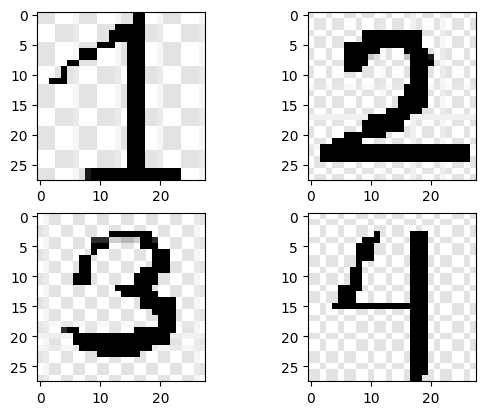

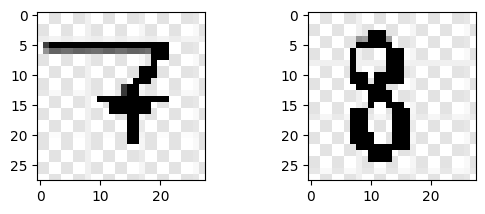

In [ ]:
plt.subplot(2,2,1)
plt.imshow(one,cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(two,cmap=plt.get_cmap('gray'))

plt.subplot(2,2,3)
plt.imshow(three,cmap=plt.get_cmap('gray'))

plt.subplot(2,2,4)
plt.imshow(four,cmap=plt.get_cmap('gray'))

plt.show()

plt.subplot(2,2,1)
plt.imshow(seven,cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(eight,cmap=plt.get_cmap('gray'))

plt.show()

# **Нейронная сеть для распознавания изображений набора данных CIFAR10**

Датасет CIFAR-10 состоит из 60000 цветных изображений размером 32x32, поделенных на 10 классов. В датасете 50000 тренировочных изображений и 10000 тестовых. В данном датасете присутствуют такие классы как: самолет, автомобиль, птица, кот, олень, собака, лягушка, лошадь, корабль, грузовик.

In [ ]:
# Загрузка и предобработка данных
(X_train,y_train),(X_test,y_test) = cifar10.load_data() # загрузка данных
X_train = X_train/255
X_test = X_test/255

170498071/170498071 [==============================] - 3s 0us/step


Примеры изображений были визуализированы

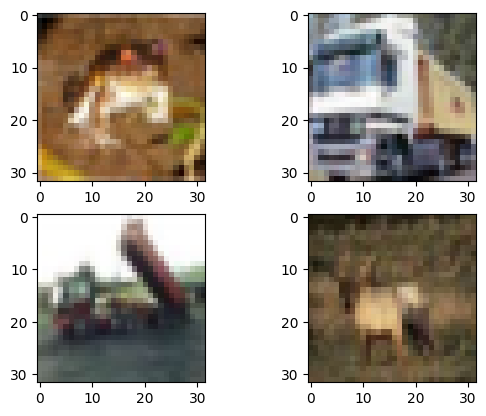

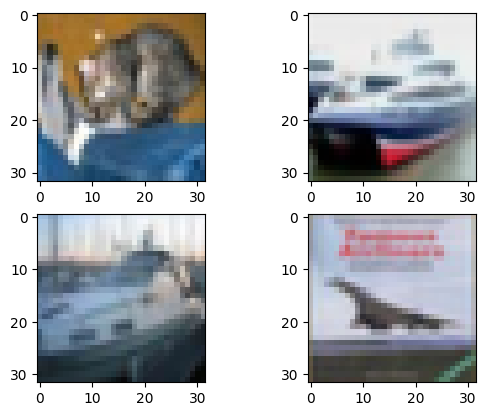

In [ ]:
plt.subplot(2,2,1)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,3)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,4)
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))

plt.show()

plt.subplot(2,2,1)
plt.imshow(X_test[0],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(X_test[1],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,3)
plt.imshow(X_test[2],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,4)
plt.imshow(X_test[3],cmap=plt.get_cmap('gray'))

plt.show()

Была создана модель с 3 сверточными слоями, двумя слоями подвыборки и с тремя слоями дропаута для избежания переобучения.

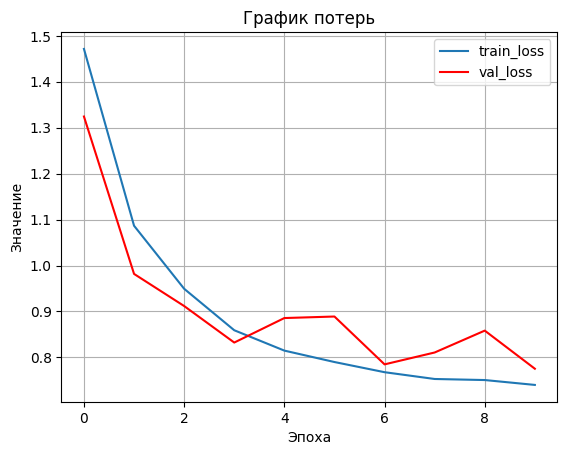

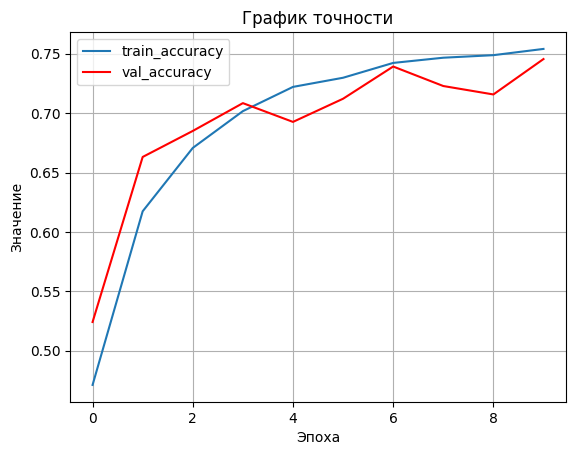

In [ ]:
# Создание сверточной нейронной сети
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3))) # слой свертки с 32 фильтрами размером 3 на 3, функция активации релу
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D()) # слой подвыборки
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D()) # слой подвыборки
model.add(Dropout(0.25))


model.add(Flatten())# выравниваение данных перед подачей на полносвязный слой

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

y_train = to_categorical(y_train) #преобразование правильных ответов в one-hotпредставление: векторы, в которыхединственная единица на месте нужной цифры
y_test = to_categorical(y_test)
# Компиляция
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)
history_df = pd.DataFrame(history.history)
#
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.471503,0.47126,1.324386,0.5242
1,1.086654,0.61738,0.981802,0.6631
2,0.949458,0.67070,0.911893,0.6850
3,0.859169,0.70166,0.832404,0.7084
4,0.814867,0.72206,0.885730,0.6926
5,0.790013,0.72976,0.889058,0.7121
6,0.767877,0.74224,0.784908,0.7392
7,0.753095,0.74662,0.810754,0.7228
8,0.750795,0.74876,0.858374,0.7157
9,0.740180,0.75402,0.775431,0.7455


По данным графикам можно сделать вывод о том, что значения точности и потерь улучшаются с каждой эпохой до 8, после которой заметно "сглаживание" графика, по чему можно понять, что значения в дальнейшем будут примерно такие же

# **Выводы**

В процессе выполнения данной лабораторной работы были получены навыки работы с полносвязными моделями нейронных сетей, с сверточными нейронными сетями для классификации изобржаений, были получены навыки анализирования оценок работы нейронных сетей с различной архитектурой. Были проведены тесты на наборе данных с изображениями рукописных цифр MNIST, в результате чего были сделаны выводы о том, что при обучении модели на данном наборе данных она достаточно точно предсказывает значения на валидационных данных из набора данных MNIST, однако, при тестировании данной модели на собственных рукописных цифрах результаты оказались куда хуже, что может заключаться в значительном отличии цифр в наборе от написаных для тестов. Также были проведены тесты модели CIFAR10, в результате которых были сделаны выводы о том, что для точных предсказываний необходимо подбирать оптимальные настройки для каждого слоя модели.


